# Tijdsreeksen vergelijken
Twee methodes (xee & ee) om tijdsreeksen te downloaden. De 'bare soil analysis' heeft soms wat andere waarden. Daarom eens bekijken of veel verschil zit op de tijdsreeksen voor eenzelfde telcirkel.

In [21]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [16]:
# Compare time series from both methods

df_1 = pd.read_csv('../06-savgol/steekproef_leemstreek_avimap_prob_50-50_v2_savgol.csv', index_col = 0)
df_2 = pd.read_csv('../06-savgol/steekproef_zandleemstreek_avimap_prob_50-50_savgol.csv', index_col = 0)
df = pd.concat([df_1, df_2], axis = 0)
df_ee = df[['OIDN', 'pointid','date','ndvi']]
df_ee.head(5)

,OIDN,pointid,date,ndvi
0,206067,Lm_37804.4,2021-09-12,0.695188
1,206067,Lm_37804.4,2021-09-22,0.701291
2,206067,Lm_37804.4,2021-10-02,0.709592
3,206067,Lm_37804.4,2021-12-11,0.743307
4,206067,Lm_37804.4,2021-12-21,0.646489


In [12]:
df_xee = pd.read_csv('./output_analysis/time_series.csv', index_col = 0).drop(['geometry_x','geometry_y'], axis=1)
df_xee.head(5)

,OIDN,pointid,date,ndvi
0,270294.0,DM_386.7,2022-02-01,0.404051
1,270294.0,DM_386.7,2022-02-11,0.356153
2,270294.0,DM_386.7,2022-02-21,0.330521
3,270294.0,DM_386.7,2022-03-03,0.330784
4,270294.0,DM_386.7,2022-03-13,0.335169


In [42]:
# Convert 'date' column to datetime
df_ee.loc[:,'date'] = pd.to_datetime(df_ee['date'])
df_xee.loc[:,'date'] = pd.to_datetime(df_xee['date'])


# Filter dataframes for a given date range
start_date = '2022-02-01'
end_date = '2023-09-01'
df1 = df_ee[(df_ee['date'] >= start_date) & (df_ee['date'] <= end_date)]
df2 = df_xee[(df_xee['date'] >= start_date) & (df_xee['date'] <= end_date)]


C:\Users\kato_vanpoucke\AppData\Local\Temp\ipykernel_18644\1647230695.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['date'] = pd.to_datetime(df1['date'])


KeyboardInterrupt: 

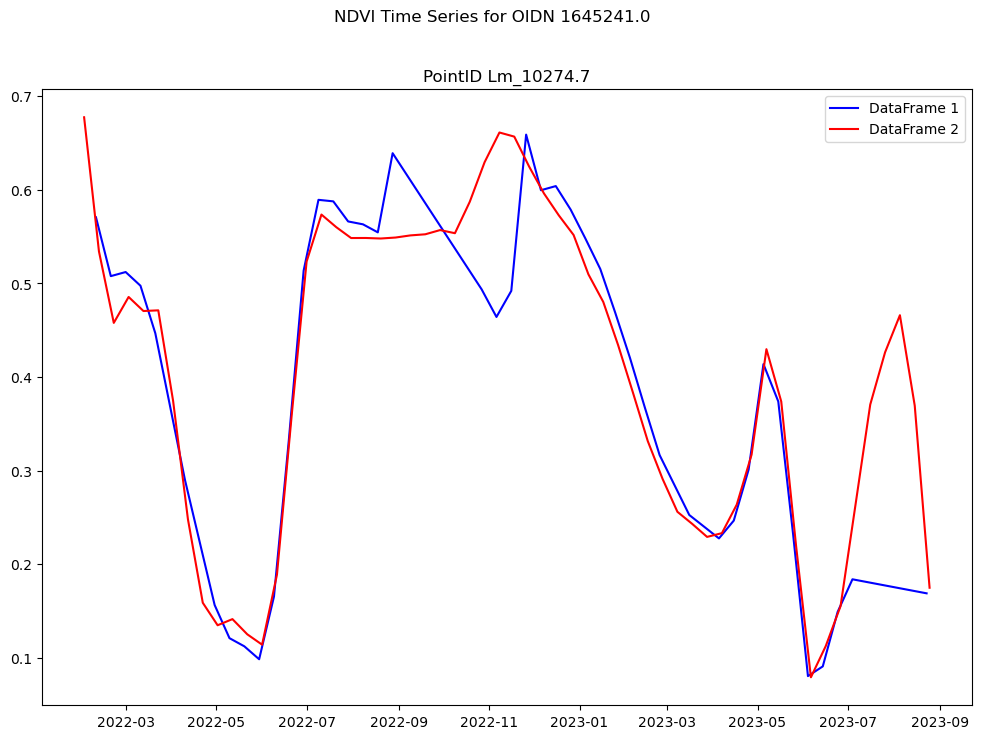

In [43]:
# Convert 'date' column to datetime if it's not already
df1['date'] = pd.to_datetime(df1['date'])
df2['date'] = pd.to_datetime(df2['date'])

# Filter dataframes for a given date range
start_date = '2022-02-01'
end_date = '2023-09-01'
df1 = df1[(df1['date'] >= start_date) & (df1['date'] <= end_date)]
df2 = df2[(df2['date'] >= start_date) & (df2['date'] <= end_date)]

# Ensure the directory for figures exists
folder_path = 'figures'
os.makedirs(folder_path, exist_ok=True)

# Get all unique OIDNs
oidns = pd.concat([df1['OIDN'], df2['OIDN']]).unique()

# Loop through each OIDN to create separate plots
for oidn in oidns:
    # Filter data for this OIDN
    df1_sub = df1[df1['OIDN'] == oidn]
    df2_sub = df2[df2['OIDN'] == oidn]
    
    # Get unique pointids for this OIDN
    pointids = pd.concat([df1_sub['pointid'], df2_sub['pointid']]).unique()

    plt.figure(figsize=(12, 8))

    for i, pointid in enumerate(pointids, start=1):
        plt.subplot(len(pointids), 1, i)

        # Plot for df1
        sub_df1 = df1_sub[df1_sub['pointid'] == pointid]
        plt.plot(sub_df1['date'], sub_df1['ndvi'], label='DataFrame 1', color='blue')
        
        # Plot for df2
        sub_df2 = df2_sub[df2_sub['pointid'] == pointid]
        plt.plot(sub_df2['date'], sub_df2['ndvi'], label='DataFrame 2', color='red')

        plt.title(f'PointID {pointid}')
        plt.legend()

    # Set a super title for all subplots
    plt.suptitle(f'NDVI Time Series for OIDN {oidn}')
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust the rect to fit the suptitle

    # Save the figure
    plt.savefig(f'{folder_path}/OIDN_{oidn}.png')
    plt.close()

